# Breast Cancer Preprocessing Analysis

In [1]:
datasetUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

headers = ['gender','mean radius', 
'mean texture', 'mean perimeter', 
'mean area', 'mean smoothness', 
'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry',
'mean fractal dimension','radius error',
'texture error','perimeter error',
'area error', 'smoothness error',
'compactness error','concavity error',
'concave points error','symmetry error',
'fractal dimension error','worst radius',
'worst texture', 'worst perimeter', 
'worst area','worst smoothness', 
'worst compactness', 'worst concavity',
'worst concave points','worst symmetry',
'worst fractal dimension']

In [2]:
import pandas as pd


cancerDf = pd.read_csv(datasetUrl, header= None)
cancerDf = cancerDf.loc[:,1:]
cancerDf.columns = headers


#### Preprocessing is a step, in which raw data is modified or transformed into a format, suitable for further downstream processing.

scikit-learn provides many preprocessing utilities such as,
- Standardization mean removal
- Scaling
- Normalization
- Binarization
- One Hot Encoding
- Label Encoding
- Imputation



In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams.update({
    "figure.figsize" : (16,8),
    "axes.grid" : True
})

# plt.style.use('dark_background')

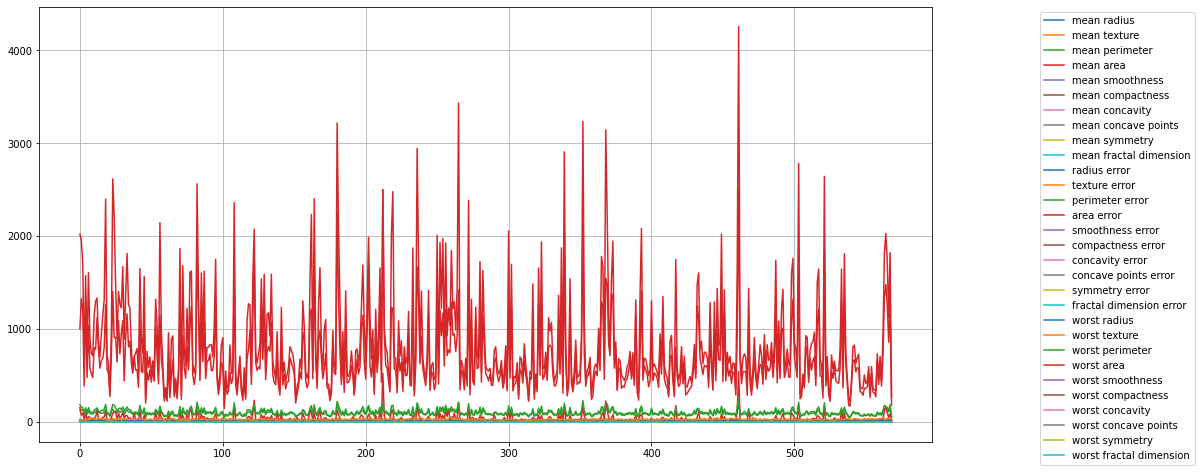

In [4]:
for column in cancerDf.iloc[:,1:].columns:
    plt.plot(cancerDf[column],label=column)
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()


In [5]:
import sklearn.preprocessing as ppUtil
import numpy as np

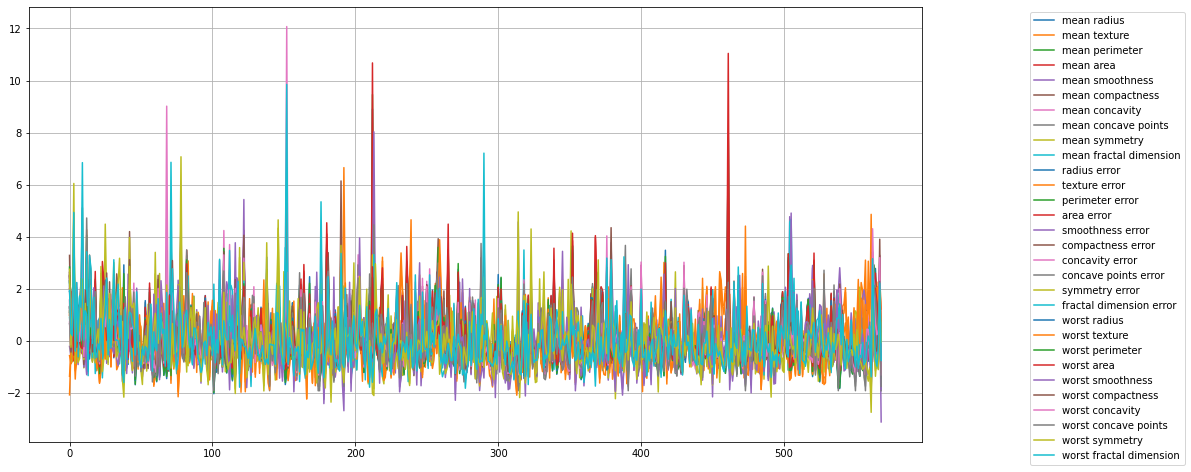

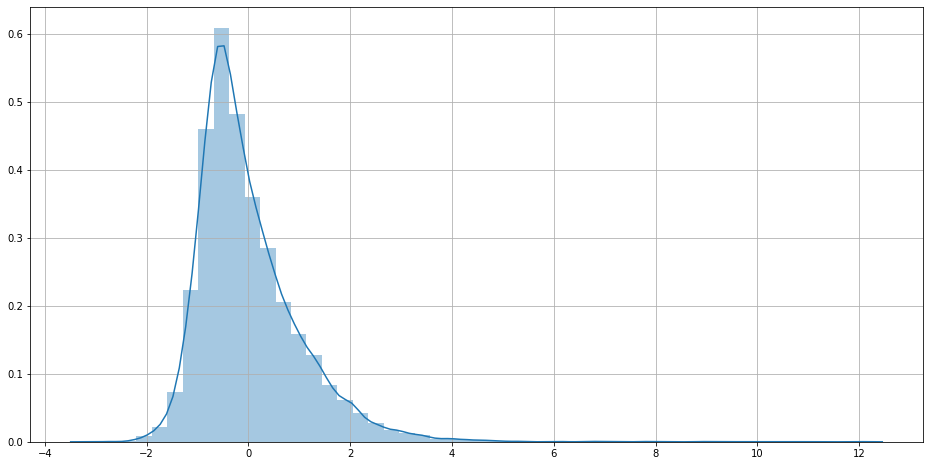

In [6]:
## Standard Scaler Operaton 
data = cancerDf.iloc[:,1:]
scaledData = pd.DataFrame(ppUtil.StandardScaler().fit_transform(data) , columns=data.columns)
# plt.plot(data)
for column in scaledData.columns:    
    plt.plot(scaledData[column],label=column)
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()

sns.distplot(scaledData)
plt.show()

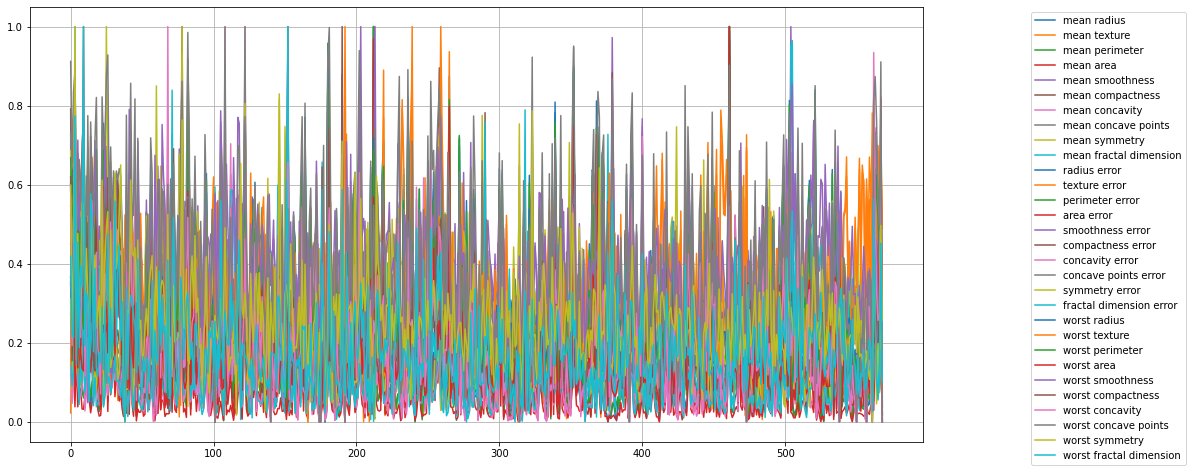

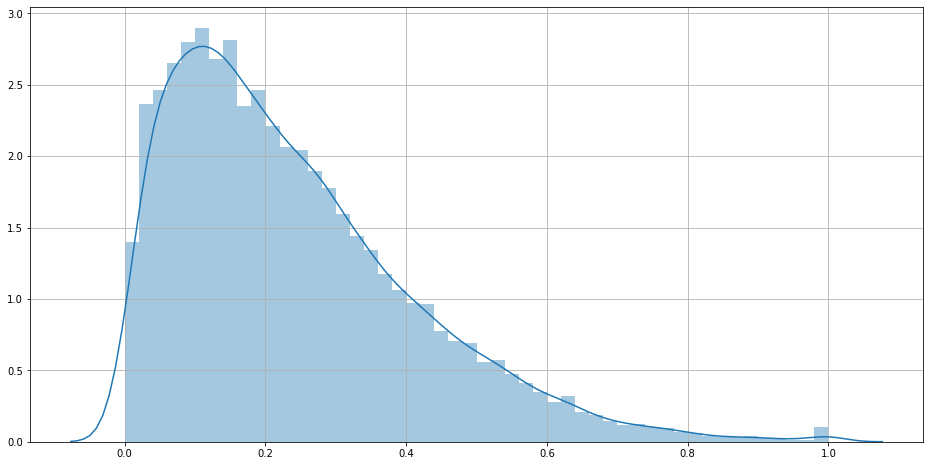

In [7]:
## Min Max Scaler Operaton 
data = cancerDf.iloc[:,1:]

### default is (0,1) but can be changed
### MinMaxScaler(feature_range=(0,10))

scaledData = pd.DataFrame(ppUtil.MinMaxScaler().fit_transform(data) , columns=data.columns)
# plt.plot(data)
for column in scaledData.columns:    
    plt.plot(scaledData[column],label=column)
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()

sns.distplot(scaledData)
plt.show()

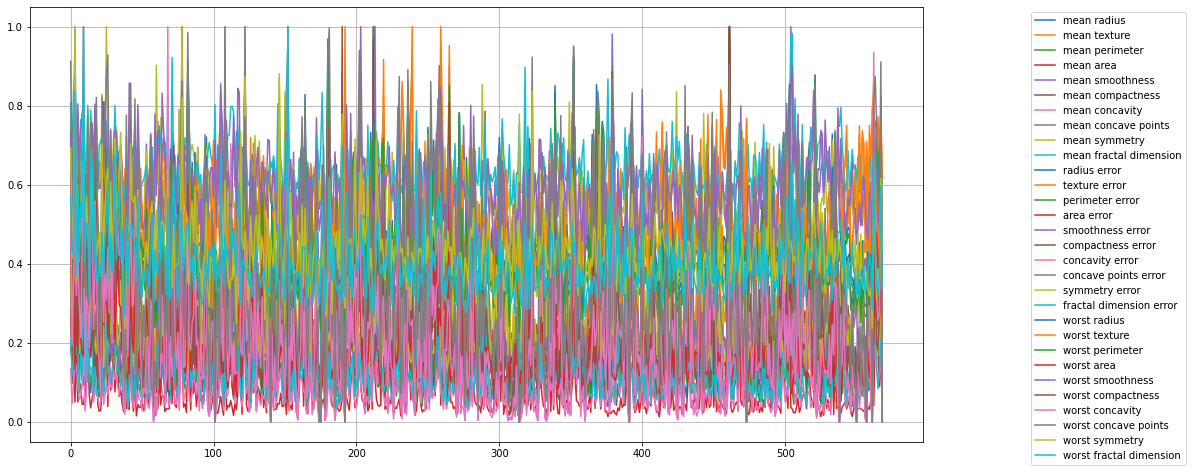

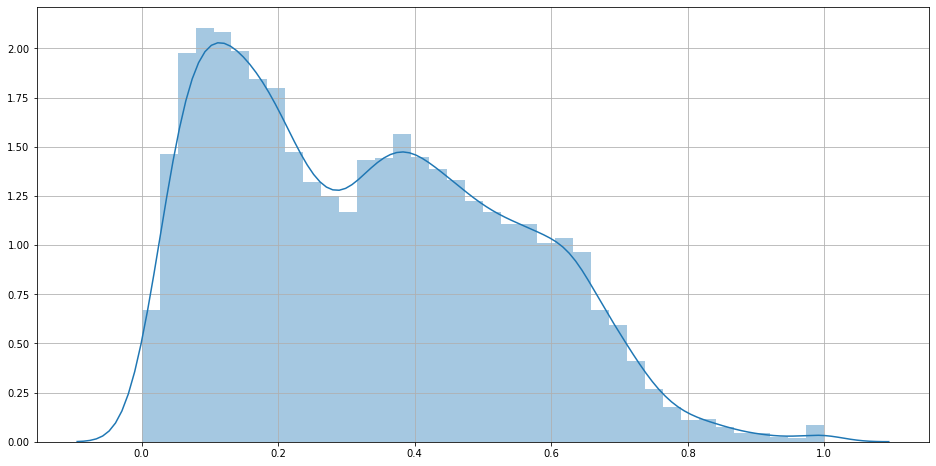

In [8]:
## Max Abs Scaler Operaton 
data = cancerDf.iloc[:,1:]

scaledData = pd.DataFrame(ppUtil.MaxAbsScaler().fit_transform(data) , columns=data.columns)
# plt.plot(data)
for column in scaledData.columns:    
    plt.plot(scaledData[column],label=column) 
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()

sns.distplot(scaledData)
plt.show()

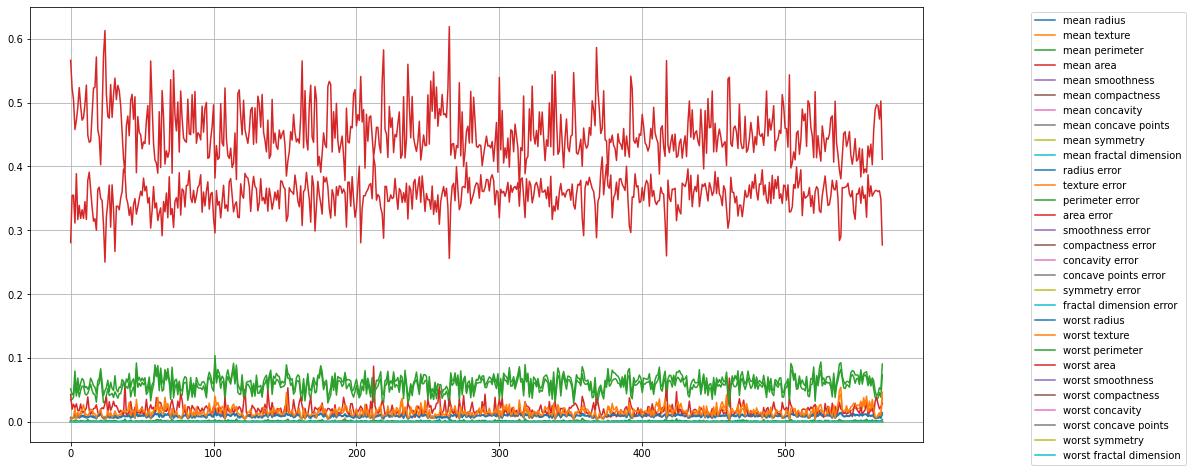

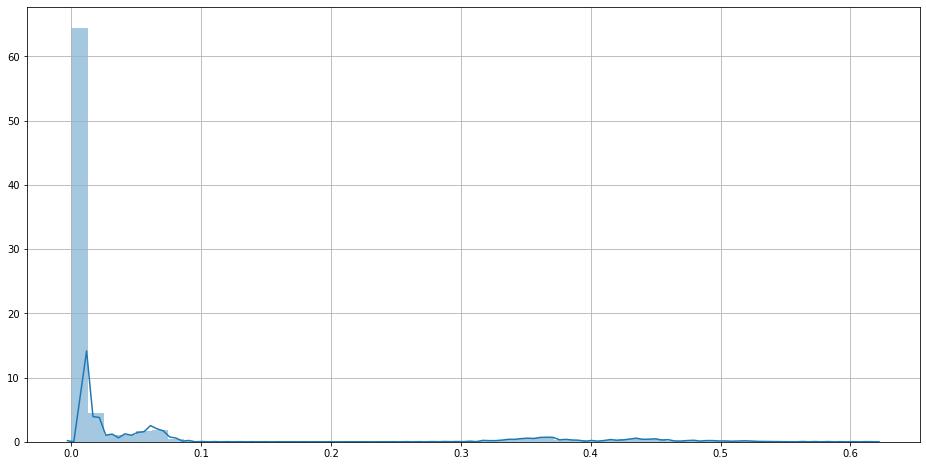

In [9]:
## Normalizer Operaton l1
data = cancerDf.iloc[:,1:]

scaledData = pd.DataFrame(ppUtil.Normalizer(norm="l1").fit_transform(data) , columns=data.columns)
# plt.plot(data)l
for column in scaledData.columns:    
    plt.plot(scaledData[column],label=column) 
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()

sns.distplot(scaledData)
plt.show()

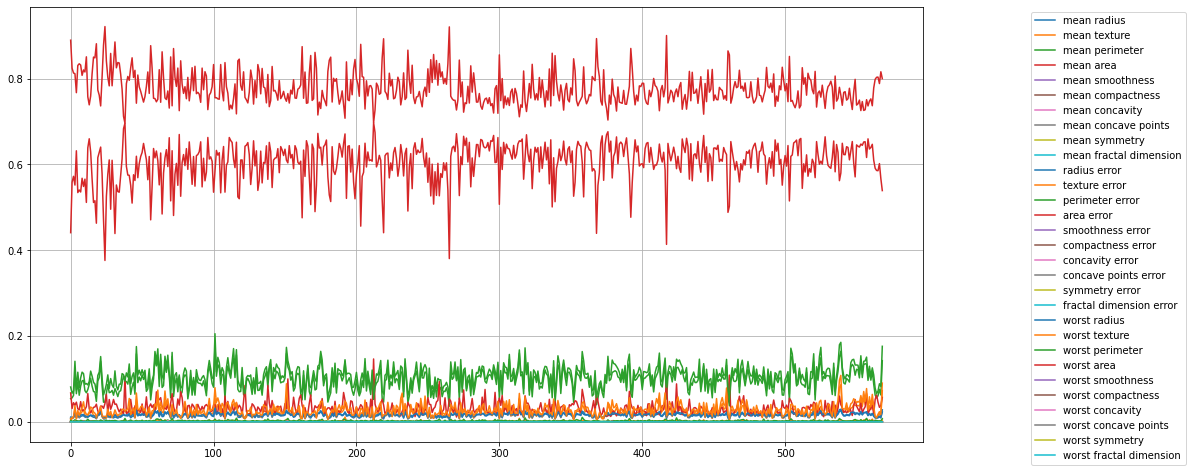

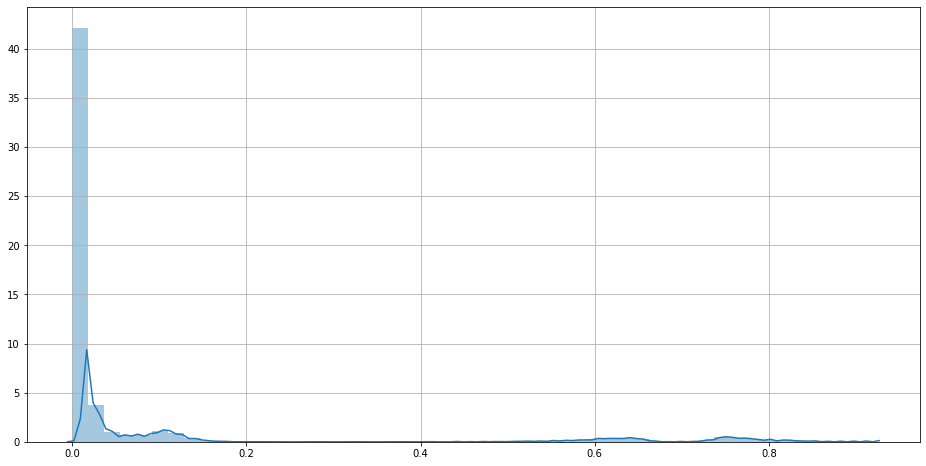

In [10]:
## Normalizer Operaton l2
data = cancerDf.iloc[:,1:]

scaledData = pd.DataFrame(ppUtil.Normalizer(norm="l2").fit_transform(data) , columns=data.columns)
# plt.plot(data)l
for column in scaledData.columns:    
    plt.plot(scaledData[column],label=column) 
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()

sns.distplot(scaledData)
plt.show()

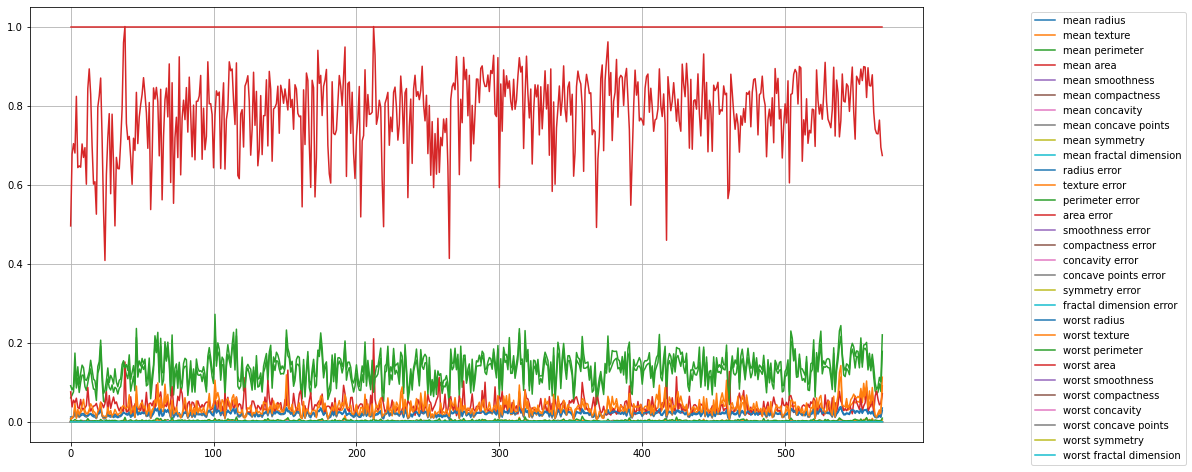

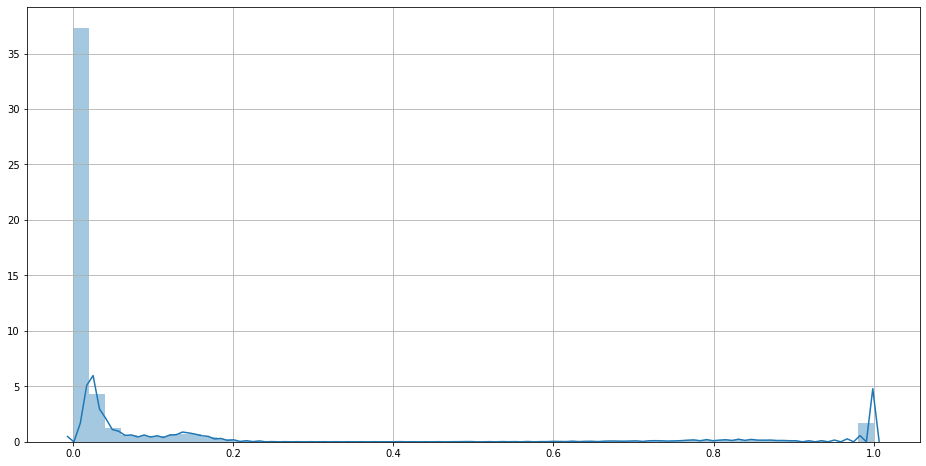

In [11]:
## Normalizer Operaton max
data = cancerDf.iloc[:,1:]

scaledData = pd.DataFrame(ppUtil.Normalizer(norm="max").fit_transform(data) , columns=data.columns)
# plt.plot(data)l
for column in scaledData.columns:    
    plt.plot(scaledData[column],label=column) 
plt.legend(loc="upper right",bbox_to_anchor=(1.3,1.0))
plt.show()

sns.distplot(scaledData)
plt.show()

In [12]:
### One Hot Encoding 

data = cancerDf['gender'].values.reshape(-1,1)
oneHotEncodedData = ppUtil.OneHotEncoder().fit(data).transform(data).toarray()

print(oneHotEncodedData)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [13]:
### Label Encoding 
data = cancerDf['gender'].values.reshape(-1,1)
labelEncodedData = ppUtil.LabelEncoder().fit(data).transform(data).reshape(-1,1)
# print(data,labelEncodedData)

/home/nishant/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [14]:
### Imputation 
from sklearn.impute import SimpleImputer as simp 

imputer = simp(missing_values=np.nan, strategy='mean')
imputedData = imputer.fit(cancerDf['mean radius'].values.reshape(-1,1)).transform(cancerDf['mean radius'].values.reshape(-1,1))

